#### To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

Features:
1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [1]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


c:\users\leo26\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv("cardio_train.csv", sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


### Exploratory Data Analysis



In [3]:
#Let's check for any missing values
data.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

##### There appears to be no missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
data.shape

(69301, 13)

In [6]:
data.drop(['id'],axis=1,inplace=True)

In [7]:
#Age is given in terms of days, let's convert it into years. 

data['Age'] = round((data['age']/365),0)
data.drop(['age'], axis=1, inplace=True)
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
0,1,155,69.0,130,80,2,2,0,0,1,0,62.0
1,1,163,71.0,110,70,1,1,0,0,1,1,40.0
2,1,165,70.0,120,80,1,1,0,0,1,0,60.0
3,2,165,85.0,120,80,1,1,1,1,1,0,40.0
4,1,155,62.0,120,80,1,1,0,0,1,0,64.0


In [8]:
data.nunique()

gender           2
height         108
weight         285
ap_hi          153
ap_lo          157
cholesterol      3
gluc             3
smoke            2
alco             2
active           2
cardio           2
Age             28
dtype: int64

##### Data Visualization

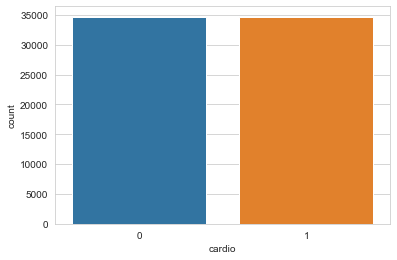

In [9]:
#Let's visualize the data 

sns.set_style("whitegrid")
sns.countplot(x='cardio', data = data)

#The data appears to be highly balanced dataset

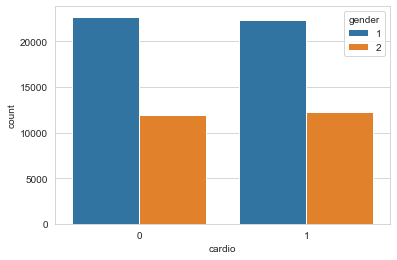

In [10]:
sns.set_style("whitegrid")
sns.countplot(x='cardio', hue='gender', data = data)

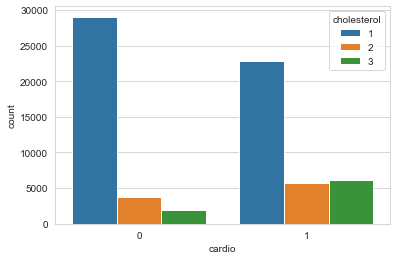

In [11]:
sns.set_style("whitegrid")
sns.countplot(x='cardio', hue='cholesterol', data = data)

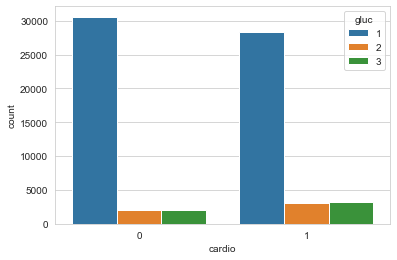

In [12]:
sns.set_style("whitegrid")
sns.countplot(x='cardio', hue='gluc', data = data)

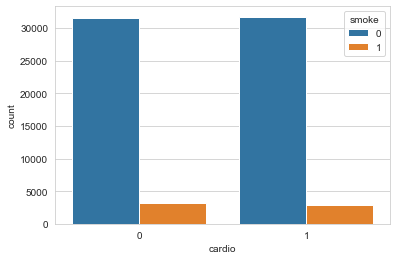

In [13]:
sns.set_style("whitegrid")
sns.countplot(x='cardio', hue='smoke', data = data)

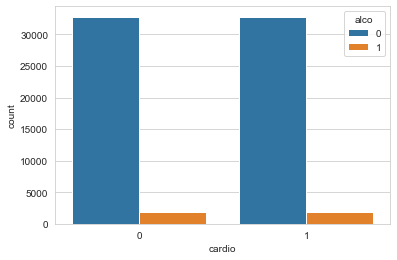

In [14]:
sns.set_style("whitegrid")
sns.countplot(x='cardio', hue='alco', data = data)

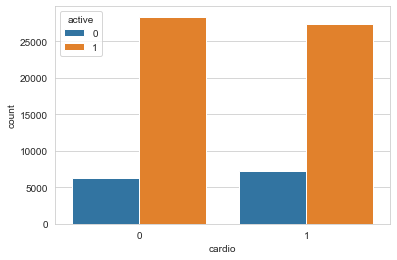

In [15]:
sns.set_style("whitegrid")
sns.countplot(x='cardio', hue='active', data = data)

c:\users\leo26\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\leo26\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\leo26\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'gender_2')

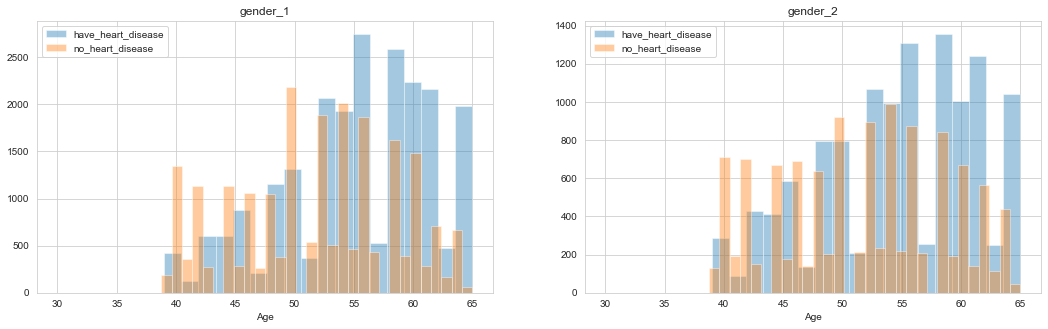

In [16]:
heart_disease = 'have_heart_disease'
no_heartdisease = 'no_heart_disease'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18, 5))
gender_1 = data[data['gender']==1]
gender_2 = data[data['gender']==2]
ax = sns.distplot(gender_1[gender_1['cardio']==1].Age.dropna(), bins=18, label = heart_disease, ax = axes[0], kde =False)
ax = sns.distplot(gender_1[gender_1['cardio']==0].Age.dropna(), bins=40, label = no_heartdisease, ax = axes[0], kde =False)
ax.legend()
ax.set_title('gender_1')
ax = sns.distplot(gender_2[gender_2['cardio']==1].Age.dropna(), bins=18, label = heart_disease, ax = axes[1], kde = False)
ax = sns.distplot(gender_2[gender_2['cardio']==0].Age.dropna(), bins=40, label = no_heartdisease, ax = axes[1], kde = False)
ax.legend()
ax.set_title('gender_2')


In [17]:
#Irrespective of the gender, people in the ages between 55 to 60 have higher risk of heart disease. 

c:\users\leo26\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


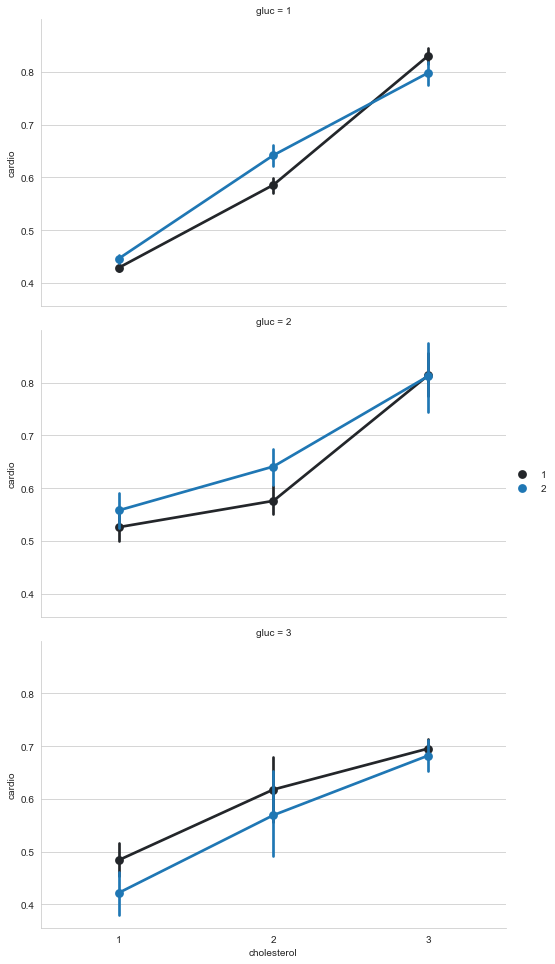

In [18]:
FacetGrid = sns.FacetGrid(data, row='gluc', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'cholesterol', 'cardio', 'gender', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [19]:
#Those with high cholesterol have high chances of getting a heart disease.Even the glucose level is above normal, their risk of heart disease is slighlty lower when their cholesterol level is less. We can say that cholesterol levels have a higher impact than glucose levels. 

c:\users\leo26\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


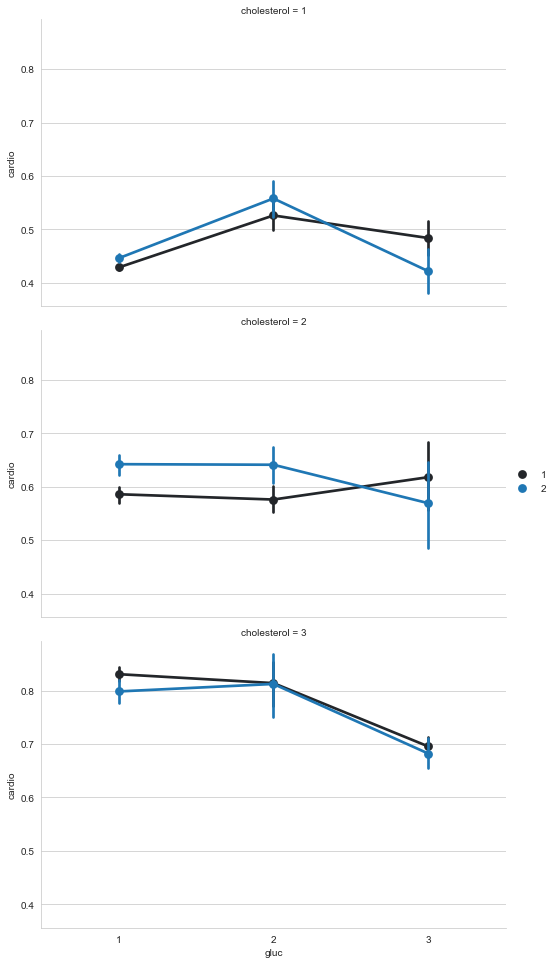

In [20]:
FacetGrid = sns.FacetGrid(data, row='cholesterol', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'gluc', 'cardio', 'gender', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [21]:
##People with high cholesterol have higher rish of disease, even when the glucose is above normal. 

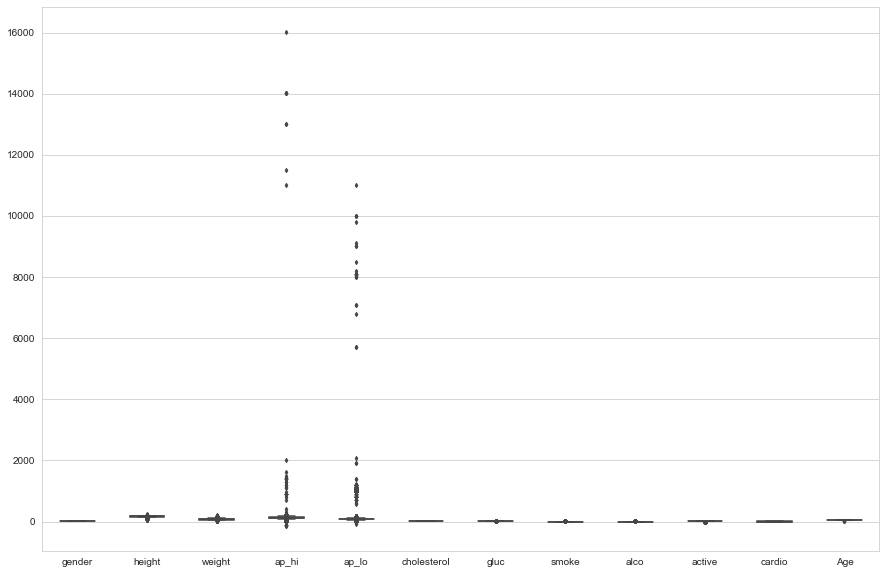

In [22]:
#Let's check for outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


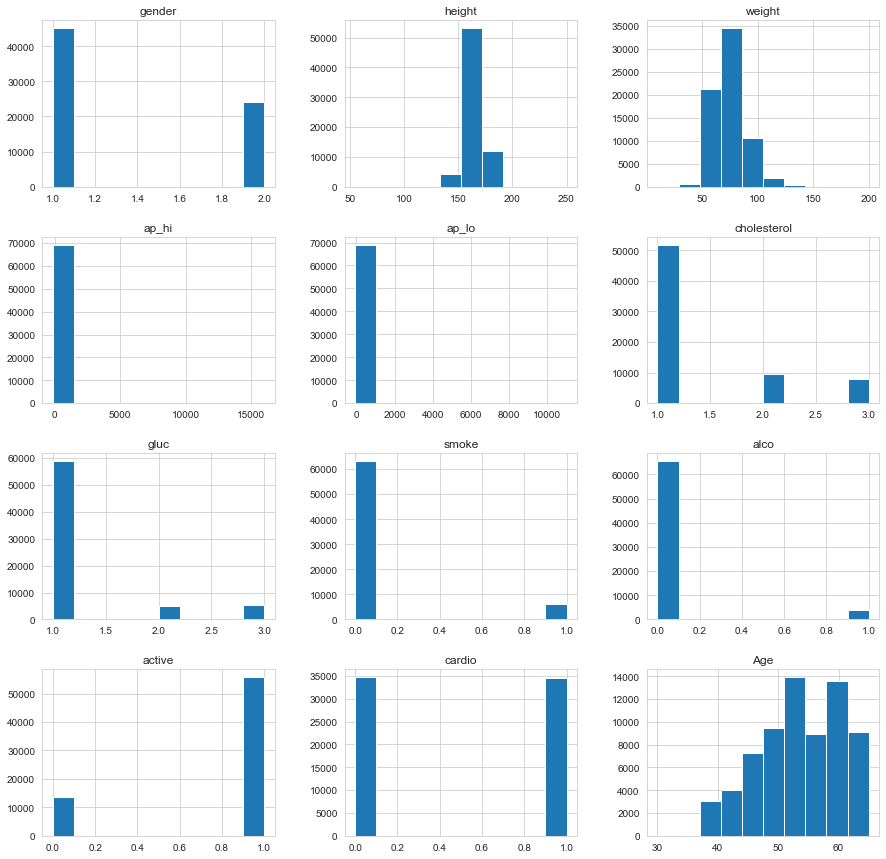

In [23]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = data.hist(ax=ax)

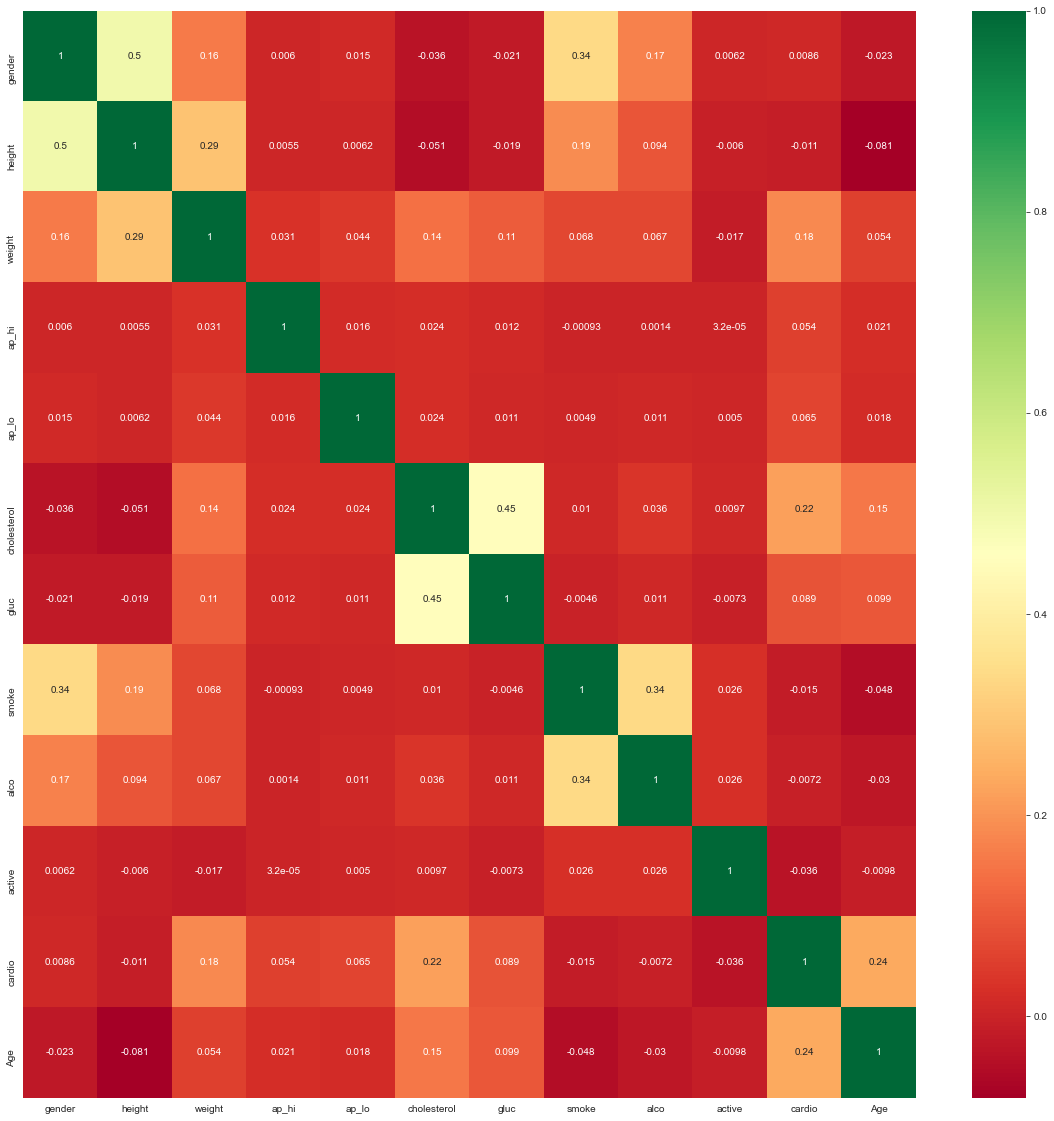

In [24]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [25]:
corr_matrix.index

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'Age'],
      dtype='object')

In [26]:
def getCorrleatedFeature(corrdata,threshold):
    feature =[]
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df

In [27]:
threshold = 0.20
corr_value = getCorrleatedFeature(corr_matrix['cardio'],threshold)
corr_value

,Corr Value
cholesterol,0.220752
cardio,1.000000
Age,0.237709


#### Handling categorical features
After exploring the dataset, I observed that we need to convert the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert - 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active' - these features.

Example: Consider the 'gender' column, it is a binary feature which has 1's and 2's as its values. Keeping it as it is would lead the algorithm to think 1 is lower value and 2 is a higher value, which should not be the case since the gender cannot be ordinal feature.

In [28]:
dataset = pd.get_dummies(data, columns=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'])

#### Feature Scaling

In [29]:
dataset.columns

Index(['height', 'weight', 'ap_hi', 'ap_lo', 'cardio', 'Age', 'gender_1',
       'gender_2', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1',
       'gluc_2', 'gluc_3', 'smoke_0', 'smoke_1', 'alco_0', 'alco_1',
       'active_0', 'active_1'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['height', 'weight', 'ap_hi','ap_lo','Age']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [31]:
dataset.head()

,height,weight,ap_hi,ap_lo,cardio,Age,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,-1.140999,-0.361739,0.007562,-0.088052,0,1.280316,1,0,0,1,0,0,1,0,1,0,1,0,0,1
1,-0.166017,-0.222690,-0.121658,-0.140935,1,-1.971535,1,0,1,0,0,1,0,0,1,0,1,0,0,1
2,0.077728,-0.292214,-0.057048,-0.088052,0,0.984693,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,0.077728,0.750657,-0.057048,-0.088052,0,-1.971535,0,1,1,0,0,1,0,0,0,1,0,1,0,1
4,-1.140999,-0.848413,-0.057048,-0.088052,0,1.575939,1,0,1,0,0,1,0,0,1,0,1,0,0,1


In [32]:
## Splitting the dataset into dependent and independent features
X = dataset.drop('cardio', axis=1)
y = dataset['cardio']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

Y_pred = logmodel.predict(X_test)

acc_log = round(logmodel.score(X_train, y_train) * 100, 2)

### K Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train) 

Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, y_train) * 100, 2)

### Decision Tree


In [36]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train) 

Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [39]:
# Which is the best model?

results = pd.DataFrame({'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes','Decision Tree'],
                        'Score': [acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
97.72,Decision Tree
97.71,Random Forest
80.57,KNN
71.82,Logistic Regression
59.91,Naive Bayes


In [40]:
##from sklearn.model_selection import ShuffleSplit
# Creating a function to calculate best model for this problem
#def find_best_model(X, y):
 #   models = {
  #      'logistic_regression': {
   #         'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
    #        'parameters': {
     #           'C': [1,5,10]
      #         }
       # },
        
       # 'decision_tree': {
        #    'model': DecisionTreeClassifier(splitter='best'),
         #   'parameters': {
          #      'criterion': ['gini', 'entropy'],
           #     'max_depth': [5,10]
            #}
        #},
        
        #'random_forest': {
         #   'model': RandomForestClassifier(criterion='gini'),
          #  'parameters': {
           #     'n_estimators': [10,15,20,50,100,200]
           # }
      #  }        
    # }
    
    #scores = [] 
    #cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    #for model_name, model_params in models.items():
     #   gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
      #  gs.fit(X, y)
       # scores.append({
        #    'model': model_name,
         #   'best_parameters': gs.best_params_,
          #  'score': gs.best_score_
      #  })
        
    #return pd.DataFrame(scores, columns=['model','best_parameters','score'])

#find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 10},0.713593
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.730697
2,random_forest,{'n_estimators': 100},0.705705


In [41]:
from sklearn.model_selection import cross_val_score
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier,X_train, y_train, cv=10)
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

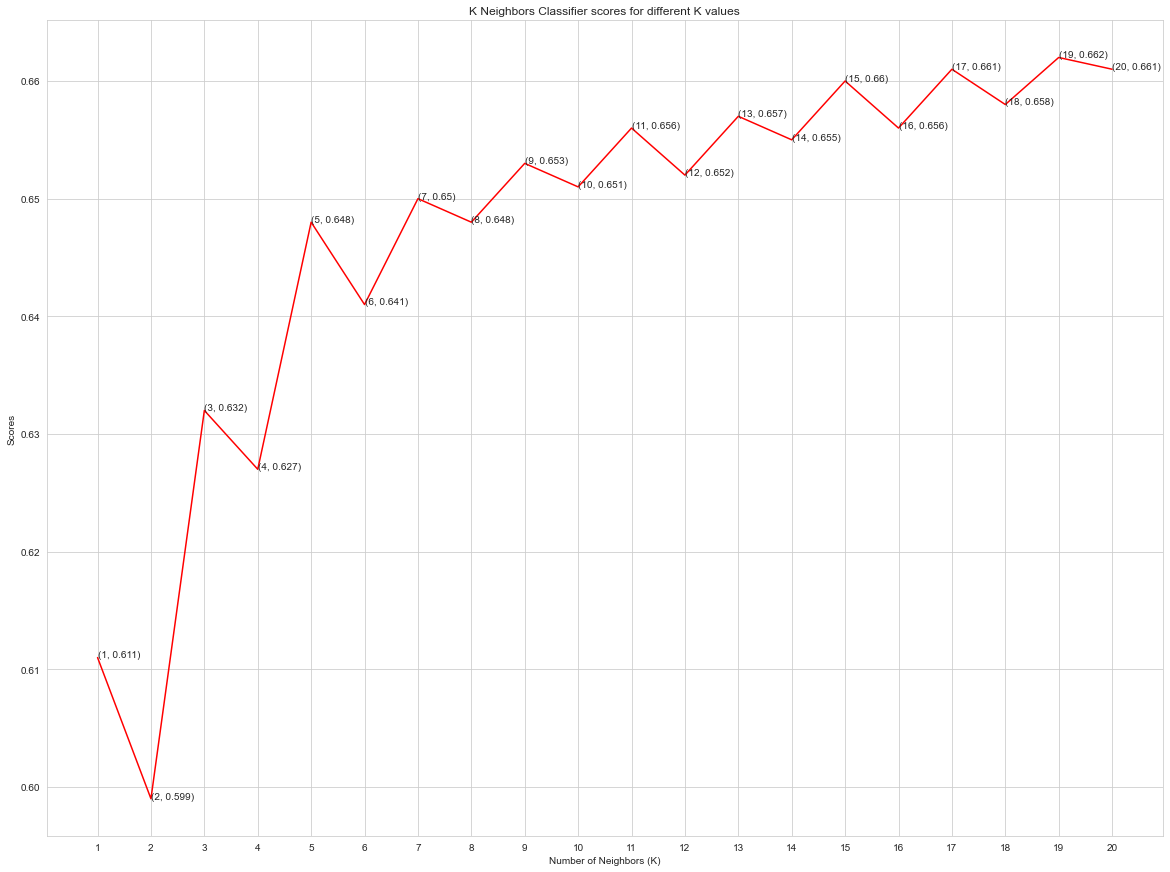

In [42]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [48]:
# Training the knn classifier model with k value as 12
knn_classifier = KNeighborsClassifier(n_neighbors=19)
cvs_scores = cross_val_score(knn_classifier, X_train, y_train, cv=10)
print("KNeighbours Classifier Accuracy with K=19 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=19 is: 66.14999999999999%


In [44]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, X_train, y_train, cv=10)
  decision_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

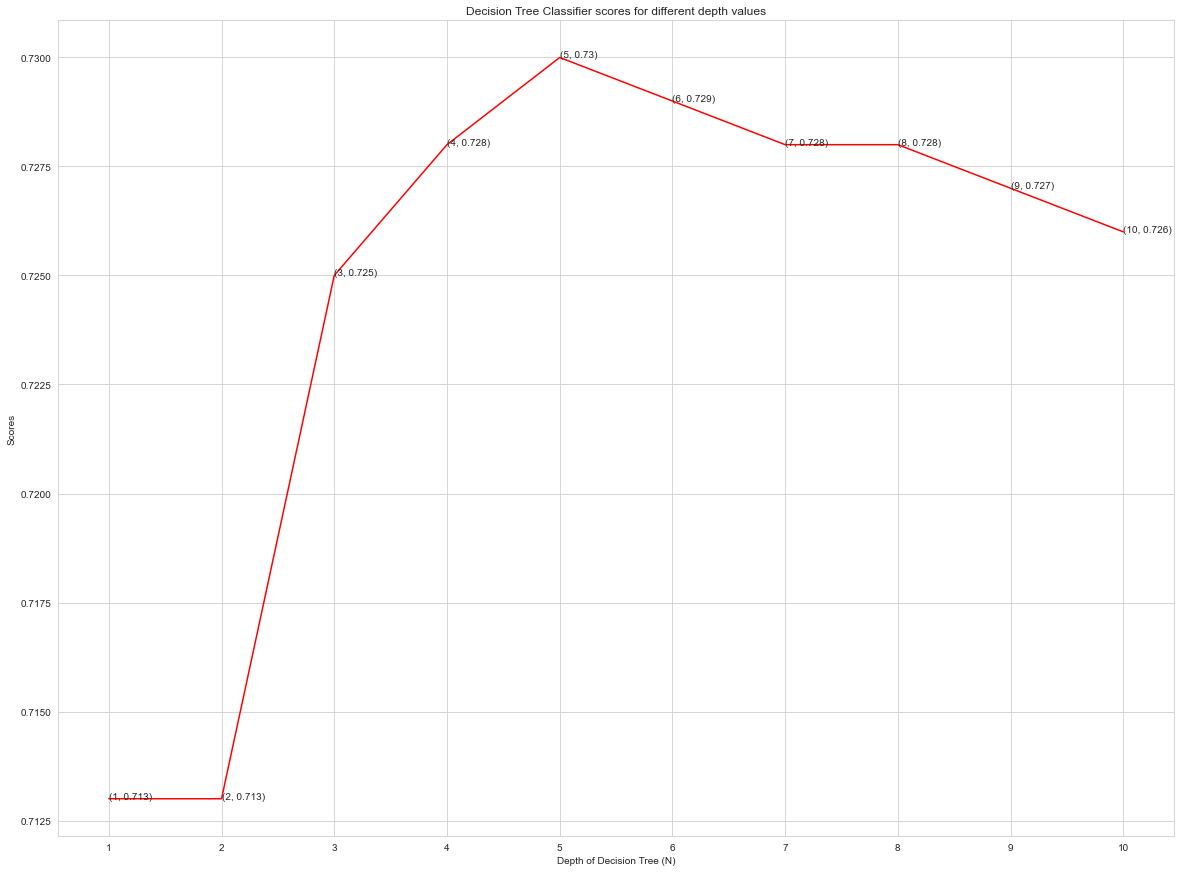

In [45]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

In [49]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=5)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=5 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=5 is: 73.00999999999999%


In [51]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

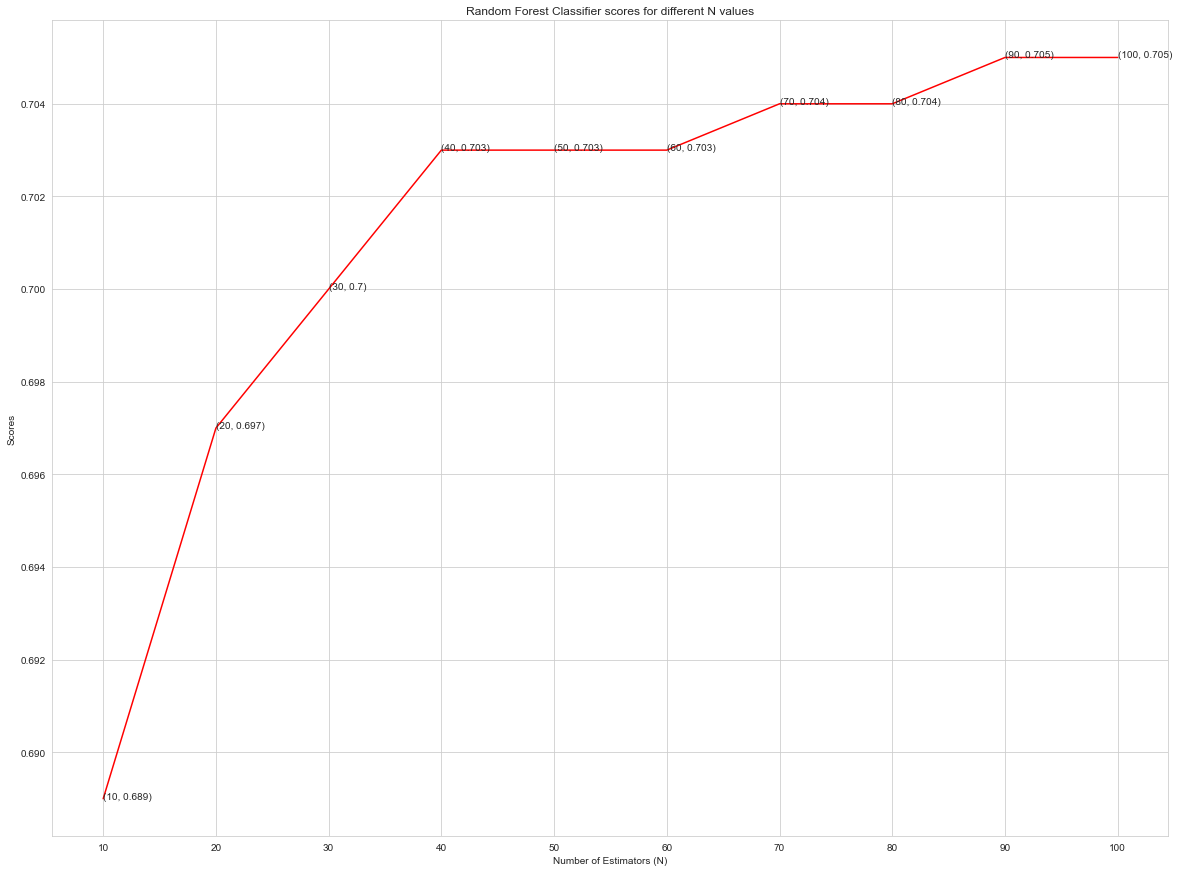

In [52]:
#Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')


In [53]:
# Training the random forest classifier model with n value as 90
forest_classifier = RandomForestClassifier(n_estimators=90)
cvs_scores = cross_val_score(forest_classifier, X_train, y_train, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=90 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=90 is: 70.36%


In [54]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=50, random_state=6)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [55]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[6107, 2554],
       [2573, 6092]], dtype=int64)

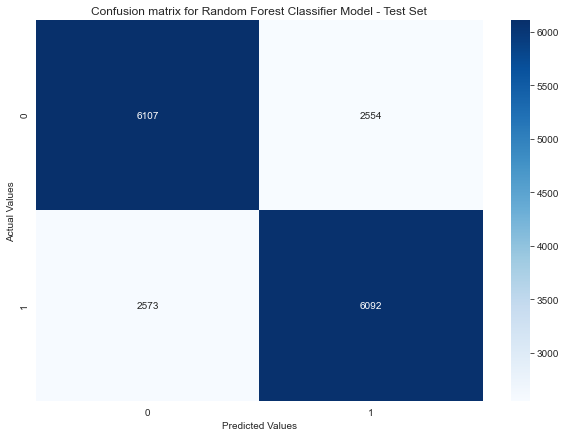

In [56]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [57]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 70.41%


In [58]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      8661
           1       0.70      0.70      0.70      8665

    accuracy                           0.70     17326
   macro avg       0.70      0.70      0.70     17326
weighted avg       0.70      0.70      0.70     17326



In [60]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[25575,   443],
       [  780, 25177]], dtype=int64)

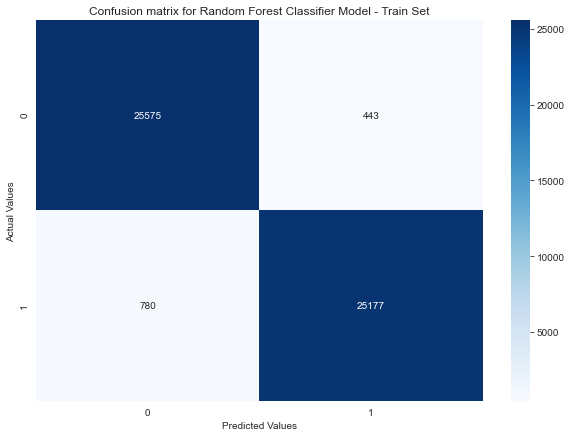

In [61]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [63]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on training set: {}%".format(score))

Accuracy on training set: 97.65%


In [64]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     26018
           1       0.98      0.97      0.98     25957

    accuracy                           0.98     51975
   macro avg       0.98      0.98      0.98     51975
weighted avg       0.98      0.98      0.98     51975



#### Prediction example

In [89]:
dataset.head()

,height,weight,ap_hi,ap_lo,cardio,Age,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,-1.140999,-0.361739,0.007562,-0.088052,0,1.280316,1,0,0,1,0,0,1,0,1,0,1,0,0,1
1,-0.166017,-0.222690,-0.121658,-0.140935,1,-1.971535,1,0,1,0,0,1,0,0,1,0,1,0,0,1
2,0.077728,-0.292214,-0.057048,-0.088052,0,0.984693,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,0.077728,0.750657,-0.057048,-0.088052,0,-1.971535,0,1,1,0,0,1,0,0,0,1,0,1,0,1
4,-1.140999,-0.848413,-0.057048,-0.088052,0,1.575939,1,0,1,0,0,1,0,0,1,0,1,0,0,1


In [97]:
# Creating a function for prediction

def predict_heart_disease(height,weight,ap_hi,ap_lo,Age,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1):
    height = float(height)
    weight = float(weight)
    ap_hi= int(ap_hi)
    ap_lo= int(ap_lo)
    gender_1 = int(gender_1)
    gender_2 = int(gender_2)
    cholesterol_1 = int(cholesterol_1)
    cholesterol_2 = int(cholesterol_2)
    cholesterol_3 = int(cholesterol_3)
    gluc_1 = int(gluc_1)
    gluc_2 = int(gluc_2)
    gluc_3 = int(gluc_3)
    smoke_0 = int(smoke_0)
    smoke_1 = int(smoke_1)
    alco_0= int(alco_0)
    alco_1= int(alco_1)
    active_0 = int(active_0)
    active_1 = int(active_1)
    Age = float(Age)
    
    x = [[(height,weight,ap_hi,ap_lo,Age,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1)]]
    x = standScaler.fit_transform(x)

    return classifier.predict(x)

In [98]:
# Prediction 1

prediction = predict_heart_disease(135.0,70.0,130,90,50.0,0,2,0,2,0,0,0,3,0,1,0,1,0,0)
if prediction:
  print('Oops! You have a risk of heart disease.')
else:
  print("Great! You don't have any risk of heart disease.")


ValueError: Found array with dim 3. StandardScaler expected <= 2.